# Principle Component Analysis

## 1. Einleitung
Dieses Jupyter Notebook stellt eine Ergänzug zu der wissenschaftlichen Arbeit über die Principle Component Analysis dar. Der prinzipielle Aufbau des Notebooks ist daher gleich mit dem der Arbeit.

## 2. Mathematische Grundlagen 
Nachfolgend werden die Grafiken erzeugt, die in der wissenschftlichen Arbeit verwendet wurden, um den Unterschied zwischen einer geringen und einer hohen Varainz zu veranschaulichen.

### 2.1 Standardabweichung und Varianz

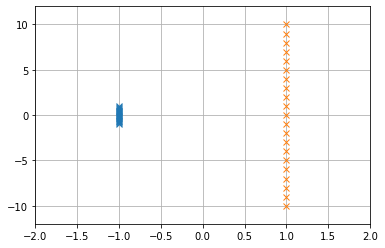

<Figure size 432x288 with 0 Axes>

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#Erstellen von Daten
X1 = np.arange(-1, 1.1, 0.1)
X2 = np.arange(-10, 11, 1)
Y1 = np.repeat(-1,len(X1))
Y2 = np.repeat(1,len(X2))

#Plotten von Daten
plt.plot(Y1, X1, 'x')
plt.plot(Y2, X2, 'x')

#Formatierung des Plots
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-12, 12)
plt.show()

#Speichern des Plots
plt.savefig('Std_Var.png')

### 2.2 Eigenwerte und Eigenvektoren


In [ ]:
#Erstellen einer Matix


#Berechnung der Eigenwerte und Eigenvektoren


#Zeigen, dass Eigenvektoren rechtwicklig zueinader sind


## 3. Durchführung einer PCA

### 3.1 Standardisierung

### 3.2 Berechnung der Kovarainzmatrix